**Importing libraries, functions and other components that will be used**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\William\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Reading the dataset into a pandas dataframe**

In [81]:
df = pd.read_csv('spam.csv', encoding='latin-1')

# Renaming first two columns and removing others
df = df[['v1', 'v2']]
df.columns = ['Label', 'SMS']

print(df.shape)
df.head()

(5572, 2)


,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Pre-processing and cleaning of the data**

In [82]:
stop_words = set(stopwords.words('english'))

def clean_text(sms):
    sms = sms.lower() # Converting to lowercase
    sms = re.sub(r'[^a-z0-9\s]', '', sms) # Removing everything except lowercase letters, digits, and spaces
    words = sms.split() # Tokenizing into words
    words = [word for word in words if word not in stop_words] # Removing stopwords
    cleaned_sms = ' '.join(words) # Joining words back into a string
    
    return cleaned_sms

df['Cleaned_SMS'] = df['SMS'].apply(clean_text)
df.head()


,Label,SMS,Cleaned_SMS
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


**Feature Extraction**

In [83]:
# Creating the feature matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Cleaned_SMS']) 

# Creating a dataframe for the feature matrix
df_features = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()) 
df_features.head()


,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Train-Test split and Model Training**

In [84]:
# Creating a target variable in which ham and spam labels are converted to 0 and 1 respectively
y = df["Label"].map({"ham": 0, "spam": 1})

# Splitting the data into training (80% of data) and testing (20% of data) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a Multinomial Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

**Testing Custom Messages**

In [85]:
def classify_message(sms):
    cleaned = clean_text(sms)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)
    if prediction == 1:
        label = 'Spam' 
    else:
        label = 'Ham'
    
    return label

print(classify_message("You've won a free iPhone! Click here to claim."))
print(classify_message("Hey, are we still on for dinner tonight?"))

Spam
Ham


**Model Evaluation**

Accuracy: 0.9739910313901345
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       965
           1       0.90      0.91      0.90       150

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115



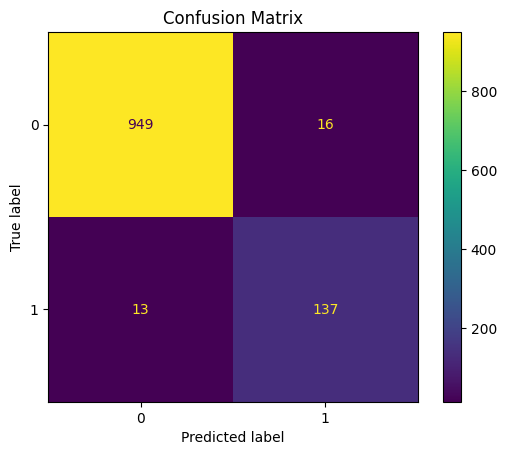

In [86]:
# Creating a list of predicted labels (0 or 1)
y_pred = model.predict(X_test)

# Comparing predicted labels with actual labels
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Creating confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()


**Visualizations**

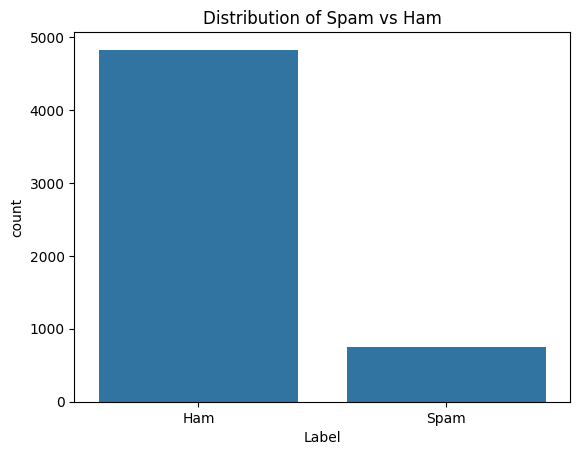

In [87]:
sns.countplot(x='Label', data=df)
plt.title('Distribution of Spam vs Ham')
plt.xticks(ticks=[0,1], labels=['Ham', 'Spam'])
plt.show()

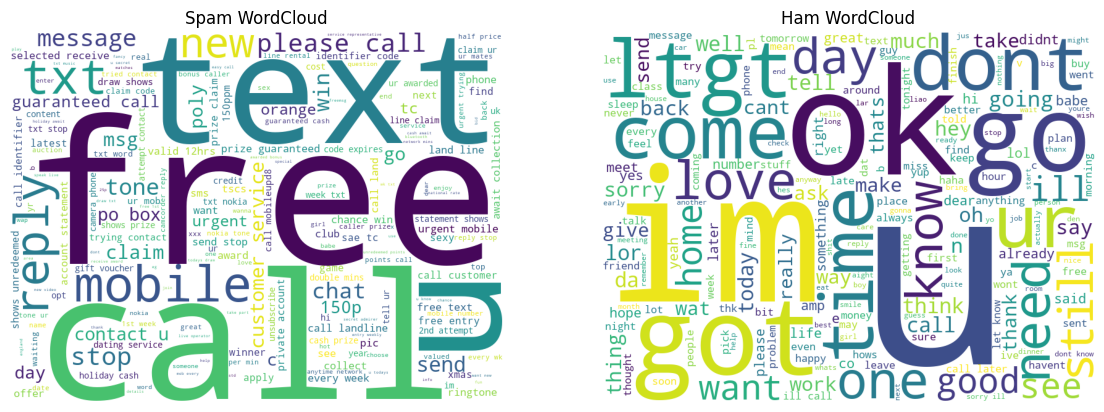

In [97]:
# Joining all messages of each type
spam_words = ' '.join(df[df['Label'] == 'spam']['Cleaned_SMS'])
ham_words = ' '.join(df[df['Label'] == 'ham']['Cleaned_SMS'])

# Plot
plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
plt.imshow(WordCloud(background_color='white', width=800, height=600).generate(spam_words))
plt.axis('off')
plt.title("Spam WordCloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(background_color='white', width=800, height=600).generate(ham_words))
plt.axis('off')
plt.title("Ham WordCloud")

plt.show()

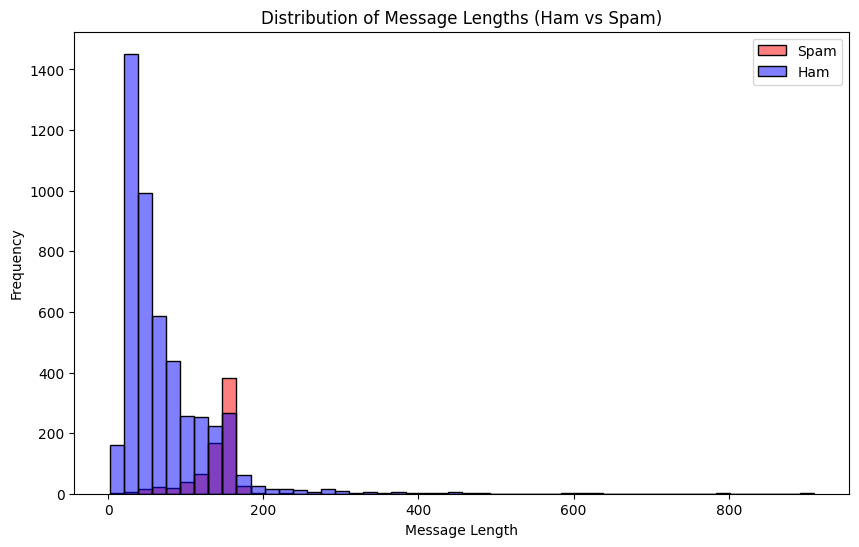

In [ ]:
# Adding a new column with message lengths (in terms of # of chars)
df['Length'] = df['SMS'].apply(len)

# Plotting histogram
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Length', hue='Label', bins=50, palette=['blue', 'red'])

# Adding labels and a title to histogram
plt.title('Distribution of Message Lengths (Ham vs Spam)')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(labels=['Spam', 'Ham'])
plt.show()